In [11]:
import pandas as pd
from decimal import Decimal
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Question 1A)

df = pd.read_csv('diabetes_01_health_indicators.csv') #Getting data from csv


has_nulls = df.isnull().values.any()
print(has_nulls) # Checking if the dataset has any null values 
                 # The result is false so there are no null values in the data


    

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Question 1 B)
print(f"Count of each class are : \n{df['Diabetes_binary'].value_counts()}")


Count of each class are : 
0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64


<BarContainer object of 2 artists>

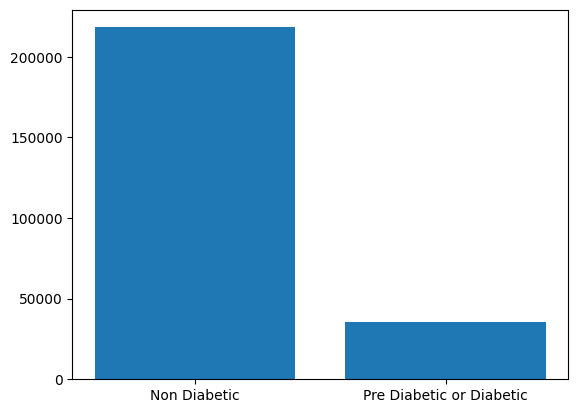

In [ ]:
#Question 1 C)

categories = ['Non Diabetic', "Pre Diabetic or Diabetic"]
values = [218334, 35346]

plt.bar(categories, values)

In [ ]:
# Question 1 D)
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.263129  0.200276   0.064761   
HighBP                       0.263129  1.000000  0.298199   0.098508   
HighChol                     0.200276  0.298199  1.000000   0.085642   
CholCheck                    0.064761  0.098508  0.085642   1.000000   
BMI                          0.216843  0.213748  0.106722   0.034495   
Smoker                       0.060789  0.096991  0.091299  -0.009929   
Stroke                       0.105816  0.129575  0.092620   0.024158   
HeartDiseaseorAttack         0.177282  0.209361  0.180765   0.044206   
PhysActivity                -0.118133 -0.125267 -0.078046   0.004190   
Fruits                      -0.040779 -0.040555 -0.040859   0.023849   
Veggies                     -0.056584 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump           -0.057056 -0.003972 -0.011543  -0.023730   
AnyHealthcare                0.016255  0.038425  0.042230   0.11

<Axes: >

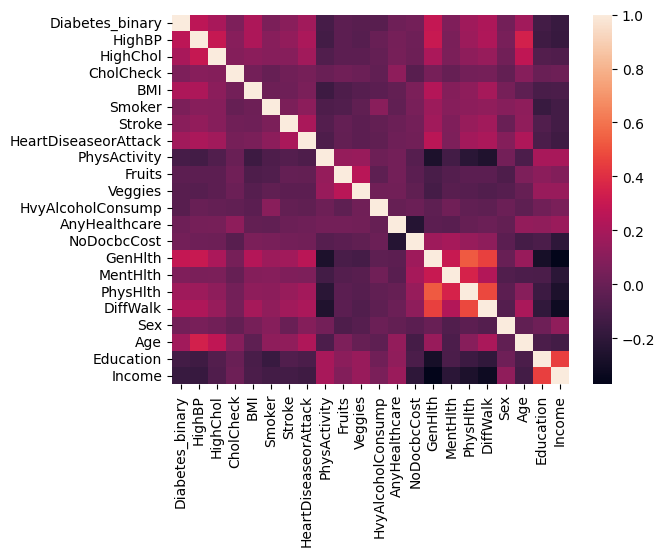

In [ ]:
#Question 1 E)
corr_matrix = df.corr()
print(corr_matrix)

sns.heatmap(corr_matrix)

In [ ]:
#Question 2A)

features = df.drop('Diabetes_binary', axis=1)  # Features
target = df['Diabetes_binary'] 